In [125]:
import cv2 as cv
import numpy as np
import pandas as pd
from PIL import Image
from PIL import ImageFilter
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.decomposition import PCA
from scipy.stats import stats

In [126]:
imagenes = []
for i in range(2,8):
    enlace = "Photos/mdb001 ("+str(i)+").png"
    #Se conviente la imagen a escala de grises
    #imagenes.append(Image.open(enlace).convert("L"))
    imagenes.append(Image.open(enlace).convert("RGB"))

im = imagenes[0]
#Filtro para hacer borrosa la imagen
out = im.filter(ImageFilter.BLUR)

print("formato: ",im.mode)

formato:  RGB


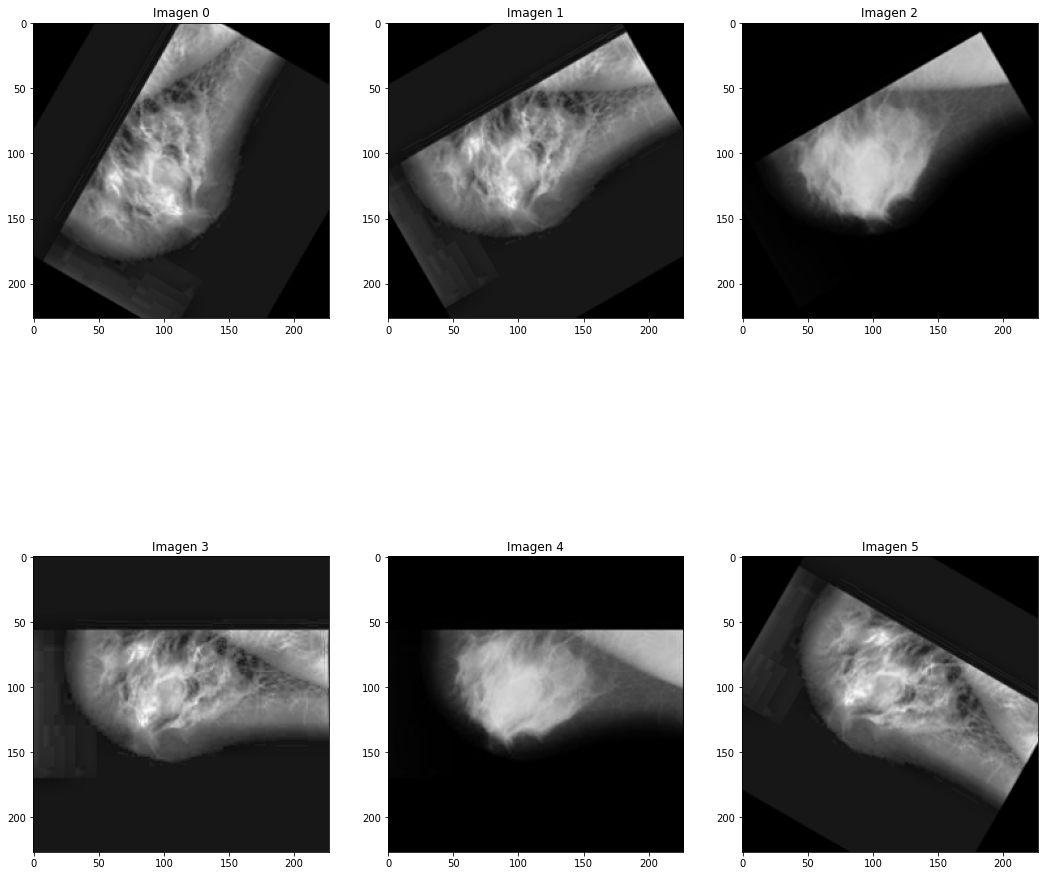

In [127]:
fig, axs = plt.subplots(2,3, figsize=(18, 18))
cont = 0
for i in range(2):
  for j in range(3):
    if cont < len(imagenes):
        axs[i,j].imshow(imagenes[(cont)])
        axs[i,j].set_title('Imagen ' + str(cont))
        cont+=1

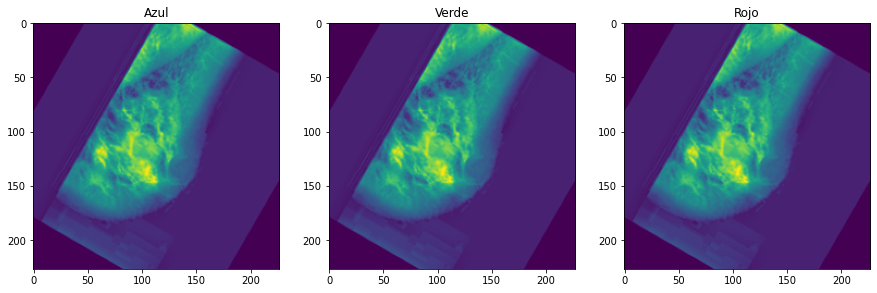

In [128]:
blue,green,red = imagenes[0].split()
# Plotting the images
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Azul")
plt.imshow(blue)
fig.add_subplot(132)
plt.title("Verde")
plt.imshow(green)
fig.add_subplot(133)
plt.title("Rojo")
plt.imshow(red)
plt.show()

In [129]:
# se convierte la imagen de Pillow a un array NumPy, que es compatible con OpenCV,
# y luego se convierte de RGB a BGR, que es el formato de color utilizado por OpenCV.
imagenes_opencv = []
for i in range(0,len(imagenes)):
    imagenes_opencv.append(cv.cvtColor(np.array(imagenes[i]), cv.COLOR_RGB2GRAY))


In [130]:
#Para redimensionar la imagen en Opencv
def rescaleFrame(frame, scale=1.75):

    for i in range(0,len(imagenes)):
    #[1] porque se refiere al ancho de la imagen
        width = int(frame[i].shape[1] * scale)
    #[1] porque se refiere a la altura de la imagen
        height = int(frame[i].shape[0] * scale)

        dimensions = (width,height)

        frame[i] = cv.resize(frame[i],dimensions, interpolation = cv.INTER_AREA)

    return frame

In [131]:
#Para probar la función de redimensionar
#imagenes_opencv = rescaleFrame(imagenes_opencv)


In [132]:
#FUNCION DE GRAFICAR

def graficar (filtro):
    
    fig, axs = plt.subplots(2,3, figsize=(12, 12))
    cont = 0
    for i in range(2):
        for j in range(3):
            if cont < len(imagenes):
                axs[i,j].imshow(imagenes[(cont)].filter(filtro))
                axs[i,j].set_title('Imagen' + str(cont))
                cont+=1

#************** FILTRO DETECCIÓN DE BORDES *****************************************
#Este filtro se utiliza para resaltar los bordes y las líneas de la imagen, 
#permitiendo una mejor visualización de la misma

def filtroBordes():
    graficar(ImageFilter.FIND_EDGES)
    

#************** FILTRO MEJORA DE BORDES *****************************************
#Este filtro se utiliza para resaltar los bordes y las líneas de la imagen, 
#permitiendo una mejor visualización de la misma

def filtroMejoraBordes():
    graficar(ImageFilter.EDGE_ENHANCE)


#************** FILTRO SHARPEN *****************************************
#Filtro de enfoque (Sharpen filter): Este filtro se utiliza
#para resaltar los detalles de la imagen y hacerla más nítida.

def filtroSharpen():
    graficar(ImageFilter.SHARPEN)


#************** FILTRO SMOOTH *****************************************
#Filtro de suavizado (Smoothing filter): Este filtro se utiliza
#para suavizar los bordes de la imagen, eliminando el ruido y mejorando la calidad de la misma

def filtroSmooth():
    graficar(ImageFilter.SMOOTH)


#************** FILTRO Contour *****************************************
#Filtro de Contorno: Este filtro se utiliza
#para localizar todos los contornos de la imagen

def filtroContour():
    graficar(ImageFilter.CONTOUR)

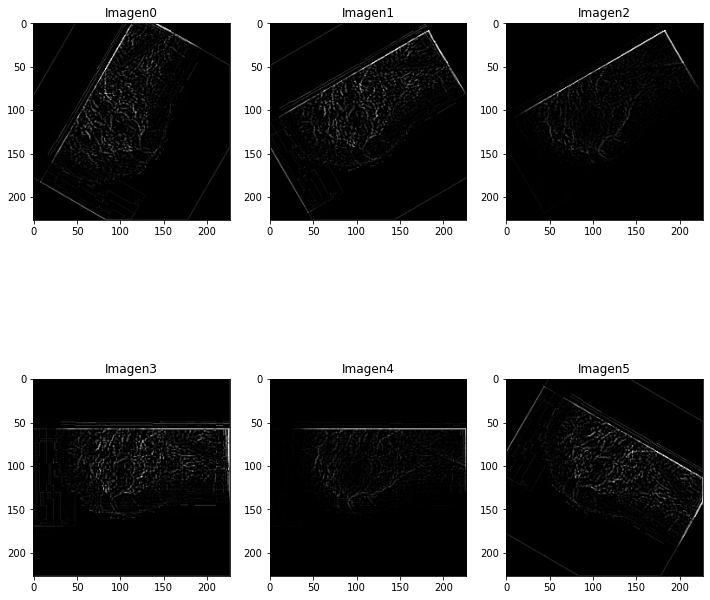

In [133]:
#Prueba Filtro 
filtroBordes()

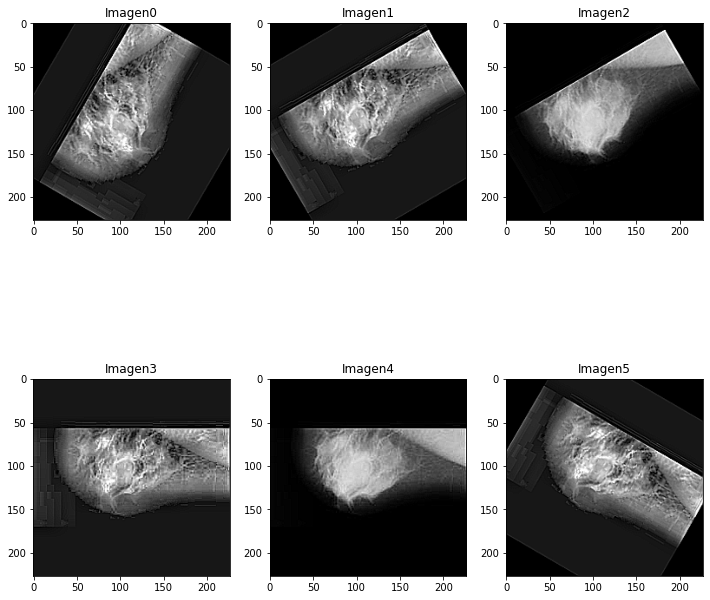

In [134]:
#Prueba Filtro 
filtroMejoraBordes()




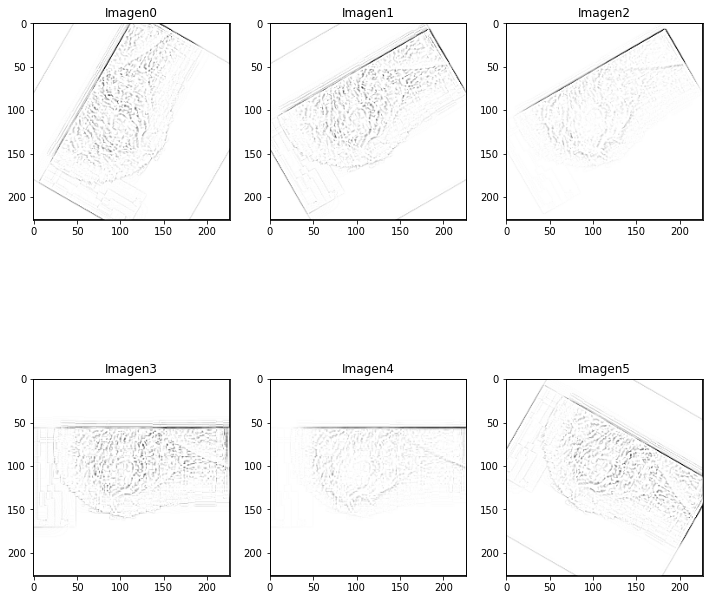

In [135]:
#Prueba Filtro 
filtroContour()

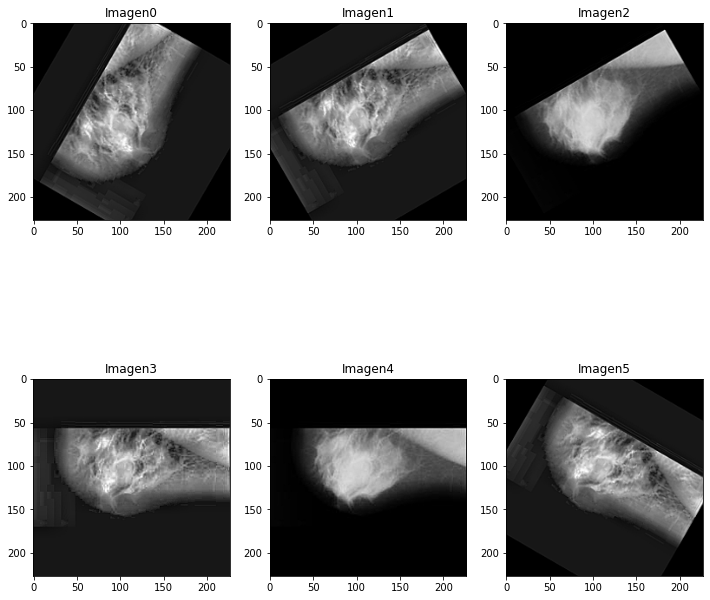

In [136]:
#Prueba Filtro 
filtroSharpen()

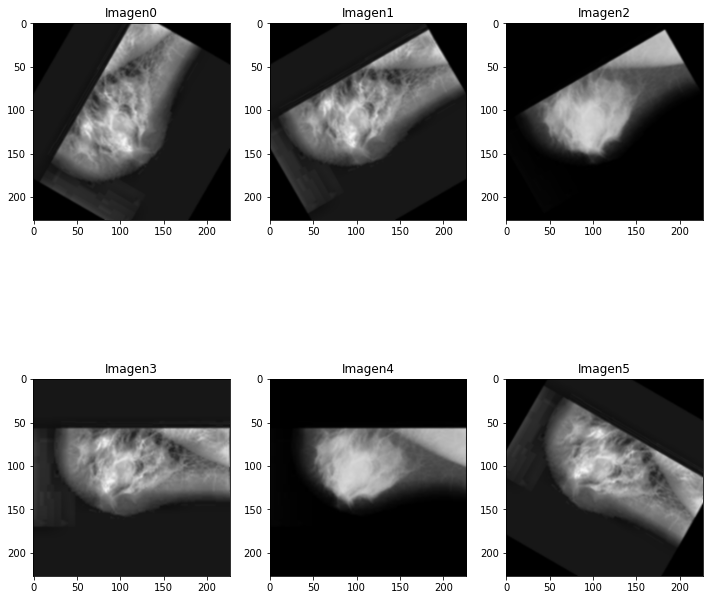

In [137]:
#Prueba Filtro 
filtroSmooth()